In [1]:
# Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de datos

df = pd.read_csv("E:/UNAD/UNAD 2025/PRIMER SEMESTRE/ANALISIS DE DATOS/Tarea 3/Vehicle dataset/car details v4.csv")

In [7]:
# Ver estructura y tipos de datos

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             2059 non-null   int64  
 1   Year              2059 non-null   int64  
 2   Kilometer         2059 non-null   int64  
 3   Fuel Type         2059 non-null   object 
 4   Transmission      2059 non-null   object 
 5   Owner             2059 non-null   object 
 6   Seller Type       2059 non-null   object 
 7   Seating Capacity  1995 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 128.8+ KB
None


In [9]:
# Estadísticas descriptivas

print(df.describe(include='all'))

               Price         Year     Kilometer Fuel Type Transmission  Owner  \
count   2.059000e+03  2059.000000  2.059000e+03      2059         2059   2059   
unique           NaN          NaN           NaN         9            2      6   
top              NaN          NaN           NaN    Diesel       Manual  First   
freq             NaN          NaN           NaN      1049         1133   1619   
mean    1.702992e+06  2016.425449  5.422471e+04       NaN          NaN    NaN   
std     2.419881e+06     3.363564  5.736172e+04       NaN          NaN    NaN   
min     4.900000e+04  1988.000000  0.000000e+00       NaN          NaN    NaN   
25%     4.849990e+05  2014.000000  2.900000e+04       NaN          NaN    NaN   
50%     8.250000e+05  2017.000000  5.000000e+04       NaN          NaN    NaN   
75%     1.925000e+06  2019.000000  7.200000e+04       NaN          NaN    NaN   
max     3.500000e+07  2022.000000  2.000000e+06       NaN          NaN    NaN   

       Seller Type  Seating

In [11]:
# Verificar valores únicos en columnas categóricas

print(df.select_dtypes(include='object').nunique())

Fuel Type       9
Transmission    2
Owner           6
Seller Type     3
dtype: int64


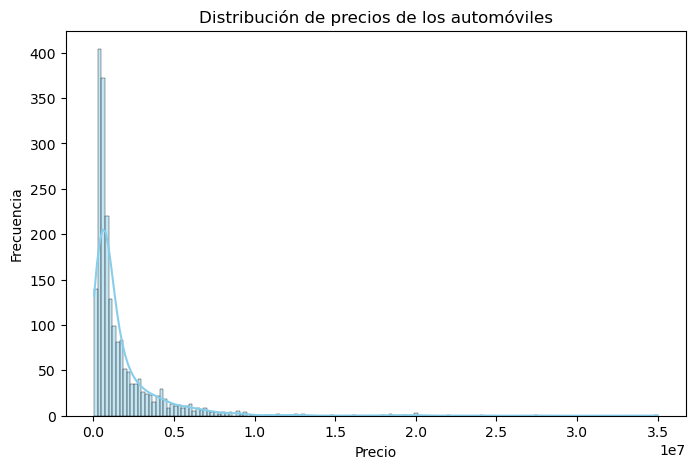

In [13]:
#  Histograma de la variable objetivo (Price)

plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], kde=True, color="skyblue")
plt.title("Distribución de precios de los automóviles")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

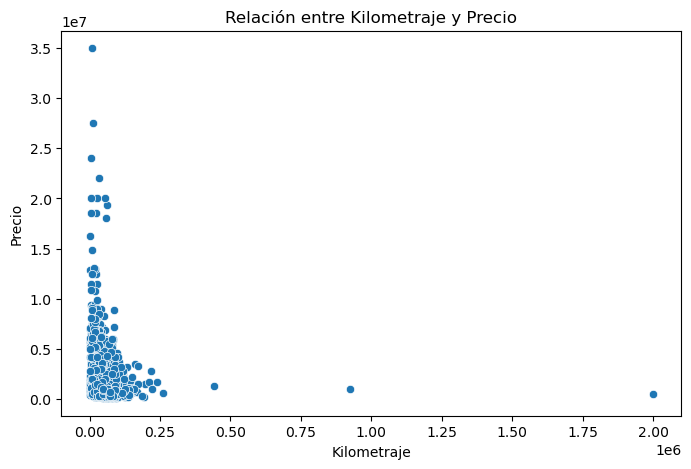

In [15]:
# Diagrama de dispersión (Price vs Kilometer)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Kilometer", y="Price")
plt.title("Relación entre Kilometraje y Precio")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.show()

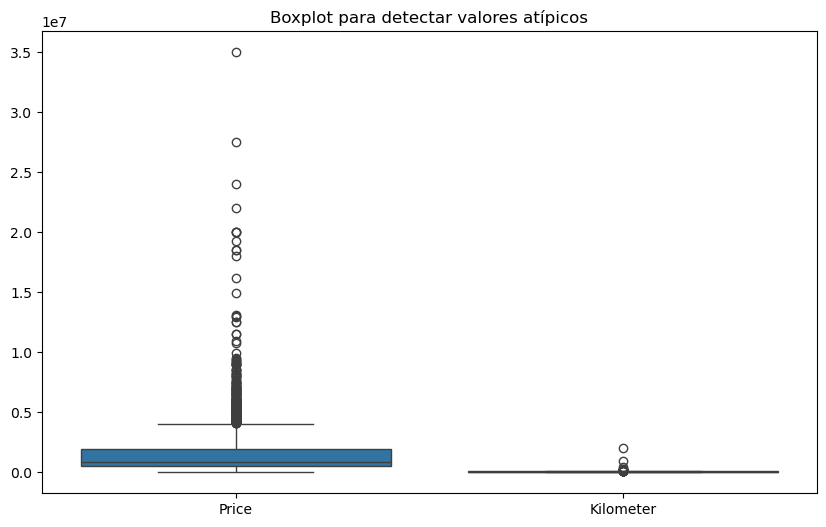

In [17]:
# Boxplot para detectar outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Price', 'Kilometer']])
plt.title("Boxplot para detectar valores atípicos")
plt.show()

In [19]:
# Selección de columnas a conservar

columns_to_keep = [
    'Price', 'Year', 'Kilometer', 'Fuel Type', 
    'Transmission', 'Owner', 'Seller Type', 'Seating Capacity'
]

df_filtered = df[columns_to_keep]


In [21]:
# Eliminar filas con valores nulos restantes

df_filtered = df_filtered.dropna()

In [23]:
# Verificar el nuevo shape

df_filtered.shape

(1995, 8)

In [25]:
# Codificación de variables categóricas

df_encoded = pd.get_dummies(df_filtered, drop_first=True)
df_encoded.head()

,Price,Year,Kilometer,Seating Capacity,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Transmission_Manual,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual
0,505000,2017,87150,5.0,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False
1,450000,2014,75000,5.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True
2,220000,2011,67000,5.0,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True
3,799000,2019,37500,5.0,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True
4,1950000,2018,69000,7.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True


In [27]:
# División Train/Test

# Separar variables predictoras (X) y variable objetivo (y)

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Entrenamiento del modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicción sobre el conjunto de prueba

y_pred = model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

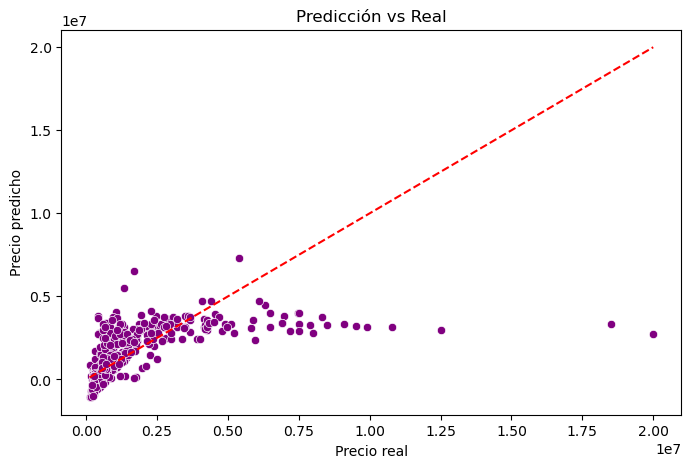

In [47]:
# Visualización de resultados

#Comparación Real vs Predicho
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="purple")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicción vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

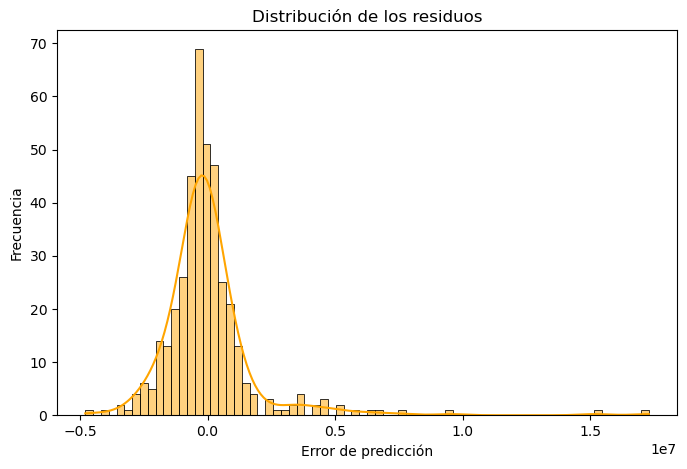

In [49]:
residuos = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='orange')
plt.title("Distribución de los residuos")
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.show()